In [99]:
library(tidyverse)
library(cowplot)
library(infer)

In [100]:
magnolia_trees <- read_csv2("data.csv") |>
    filter(GENUS_NAME == "MAGNOLIA") |>
    select(street = STD_STREET, diameter = DIAMETER) |>
    filter(street %in% c("CHARLES ST", "CHURCHILL ST"))

head(magnolia_trees)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 149937 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (13): STD_STREET, GENUS_NAME, SPECIES_NAME, CULTIVAR_NAME, COMMON_NAME,...
dbl   (4): TREE_ID, CIVIC_NUMBER, ON_STREET_BLOCK, HEIGHT_RANGE_ID
num   (1): DIAMETER
date  (1): DATE_PLANTED

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


street,diameter
<chr>,<dbl>
CHURCHILL ST,30
CHURCHILL ST,30
CHURCHILL ST,30
CHURCHILL ST,30
CHURCHILL ST,30
CHURCHILL ST,20


Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_bar()`).”


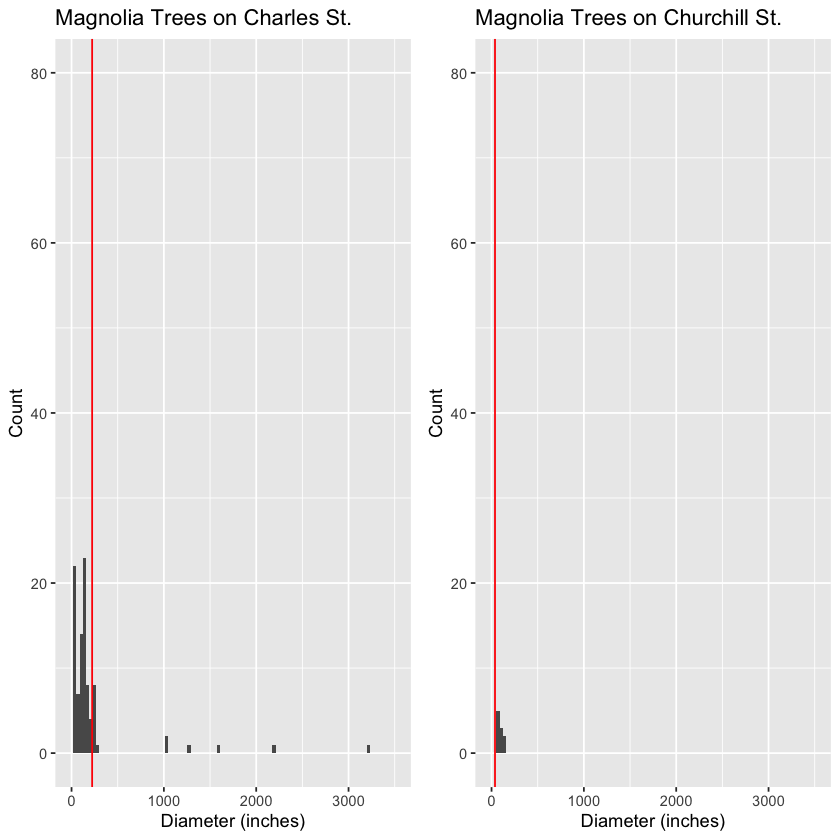

In [101]:
charles_st_trees_graph <- magnolia_trees |>
    filter(street == "CHARLES ST") |>
    ggplot(aes(x = diameter)) +
    geom_histogram(bins = 100) +
    geom_vline(xintercept = filter(magnolia_tree_means, street == "CHARLES ST")$mean, color = "red") +
    xlim(0, 3500) +
    ylim(0, 80) +
    ggtitle("Magnolia Trees on Charles St.") +
    labs(x = "Diameter (inches)", y = "Count")

churchill_st_trees_graph <- magnolia_trees |>
    filter(street == "CHURCHILL ST") |>
    ggplot(aes(x = diameter)) +
    geom_histogram(bins = 100) +
    geom_vline(xintercept = filter(magnolia_tree_means, street == "CHURCHILL ST")$mean, color = "red") +
    xlim(0, 3500) +
    ylim(0, 80) +
    ggtitle("Magnolia Trees on Churchill St.") +
    labs(x = "Diameter (inches)", y = "Count")

plot_grid(charles_st_trees_graph, churchill_st_trees_graph)